In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

print("Everything is imported perfectly!")

In [30]:
#Load the data

df = pd.read_csv('netflix_titles.csv')

print(df.head())
print(df.info())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [11]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [14]:
df['country'].fillna('Unknown')
df['director'].fillna('Unknown')
df['cast'].fillna('Unknown')

0                                                 Unknown
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                 Unknown
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                              Unknown
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [16]:
df['date_added'].fillna('Unknown')
df['rating'].fillna('Unknown')
df['duration'].fillna('Unknown')

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

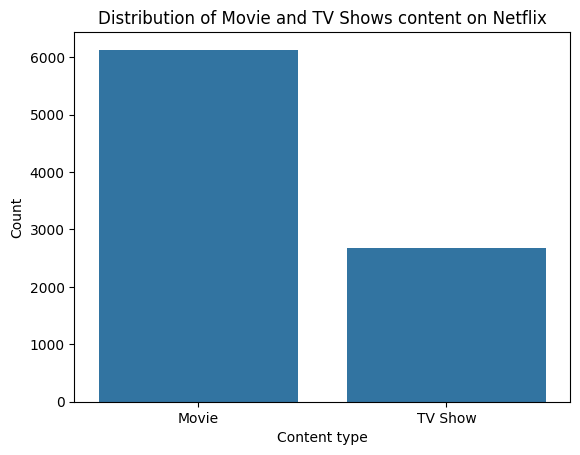

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

type_counts = df['type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.xlabel('Content type')
plt.ylabel('Count')
plt.title('Distribution of Movie and TV Shows content on Netflix')
plt.show()

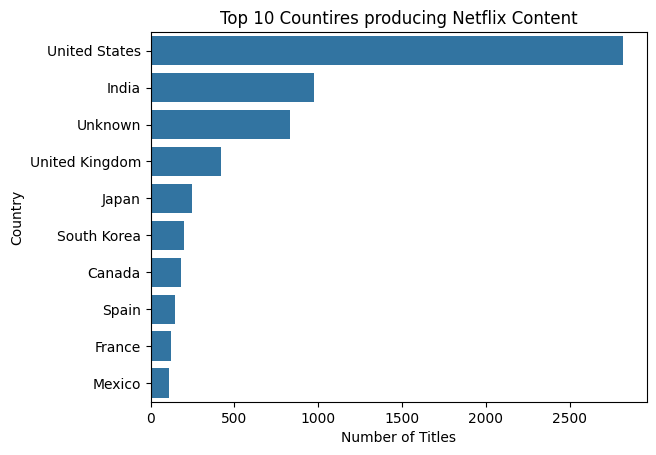

In [26]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Countires producing Netflix Content')
plt.show()

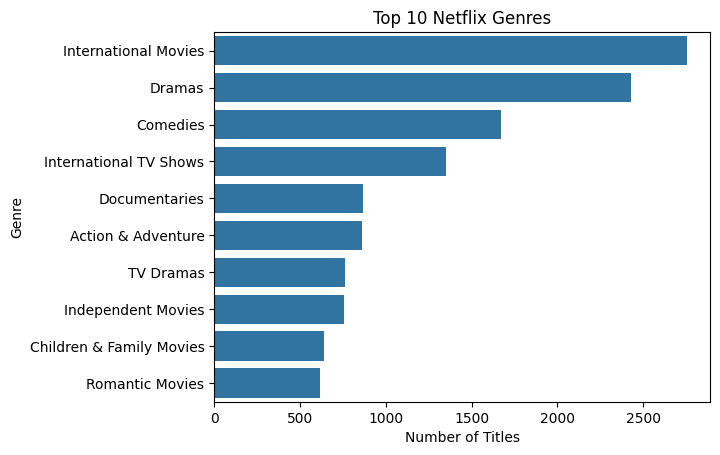

In [28]:
from collections import Counter

all_genres = ','.join(df['listed_in'].dropna())
genre_list = [genre.strip() for genre in all_genres.split(',')]
top_genres = Counter(genre_list).most_common(10)

genres, counts = zip(*top_genres)
sns.barplot(x=list(counts), y=list(genres))
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.title('Top 10 Netflix Genres')
plt.show()

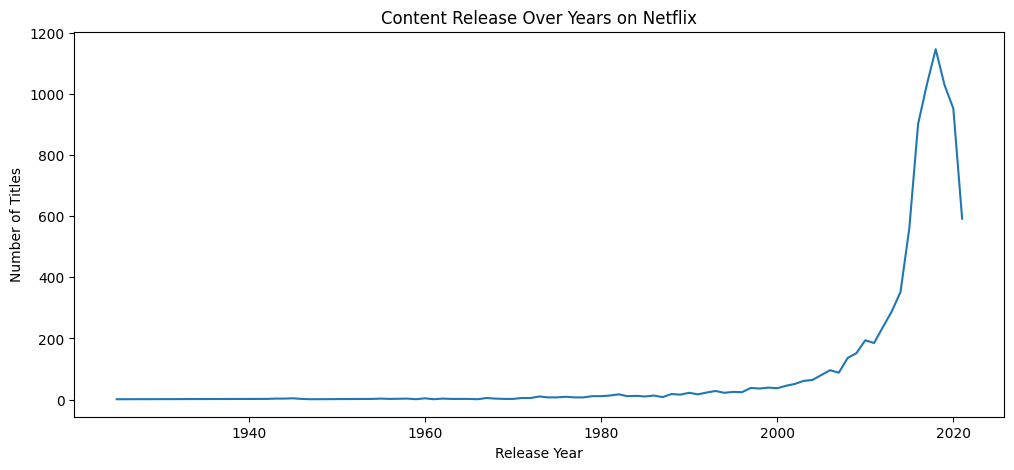

In [29]:
content_per_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,5))
sns.lineplot(x=content_per_year.index, y=content_per_year.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Content Release Over Years on Netflix')
plt.show()

